\begin{equation}
\gamma^2 y''+y=\beta e^{\alpha x}
\\y''= \frac{\beta e^{\alpha x} - y}{\gamma^2}
\end{equation}


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#integration steps:
Steps=100

#Given variables:
alpha = 1
beta = 1
gamma = 1

x0 = 0
y0 = 100 
xn = 3.0 * np.pi / 2.0
yn = 0.0

#time step is the time range divided by the integration steps
h = (xn-x0)/(Steps-1)

def ForcingFunction(x):
    return beta * np.exp(alpha * x)


In [3]:
A = np.zeros(shape=(Steps-2,Steps-2))
u = np.zeros(shape=(Steps-2,1))
b = np.zeros(shape=(Steps-2,1))

In [4]:
for j in range(Steps-2):
  if j > 0: A[j,j-1]=1
  A[j,j]=h**2-2
  if j < Steps-4: A[j,j+1]=1
  b[j]=h**2 * ForcingFunction((j+1)*h)

b[0] = h**2 * ForcingFunction(x0+h) - y0
b[Steps-3] = h**2 * ForcingFunction(xn-h) - yn


In [5]:
A=np.array(A)
Aprime = np.linalg.inv(A)
u = Aprime.dot(b)

In [6]:
u2=[]
u2.append(y0)
for i in range(Steps-2):
  u2.append(u[i])
u2.append(yn)
ticks = []
for i in range(Steps):
  ticks.append(i * h)

In [7]:
truth = []
for i in range(Steps):
    truth.append( (1/2*np.exp(xn)-yn)*np.sin(i*h) + (y0-1/2)*np.cos(i*h) + 1/2*np.exp(i*h) )

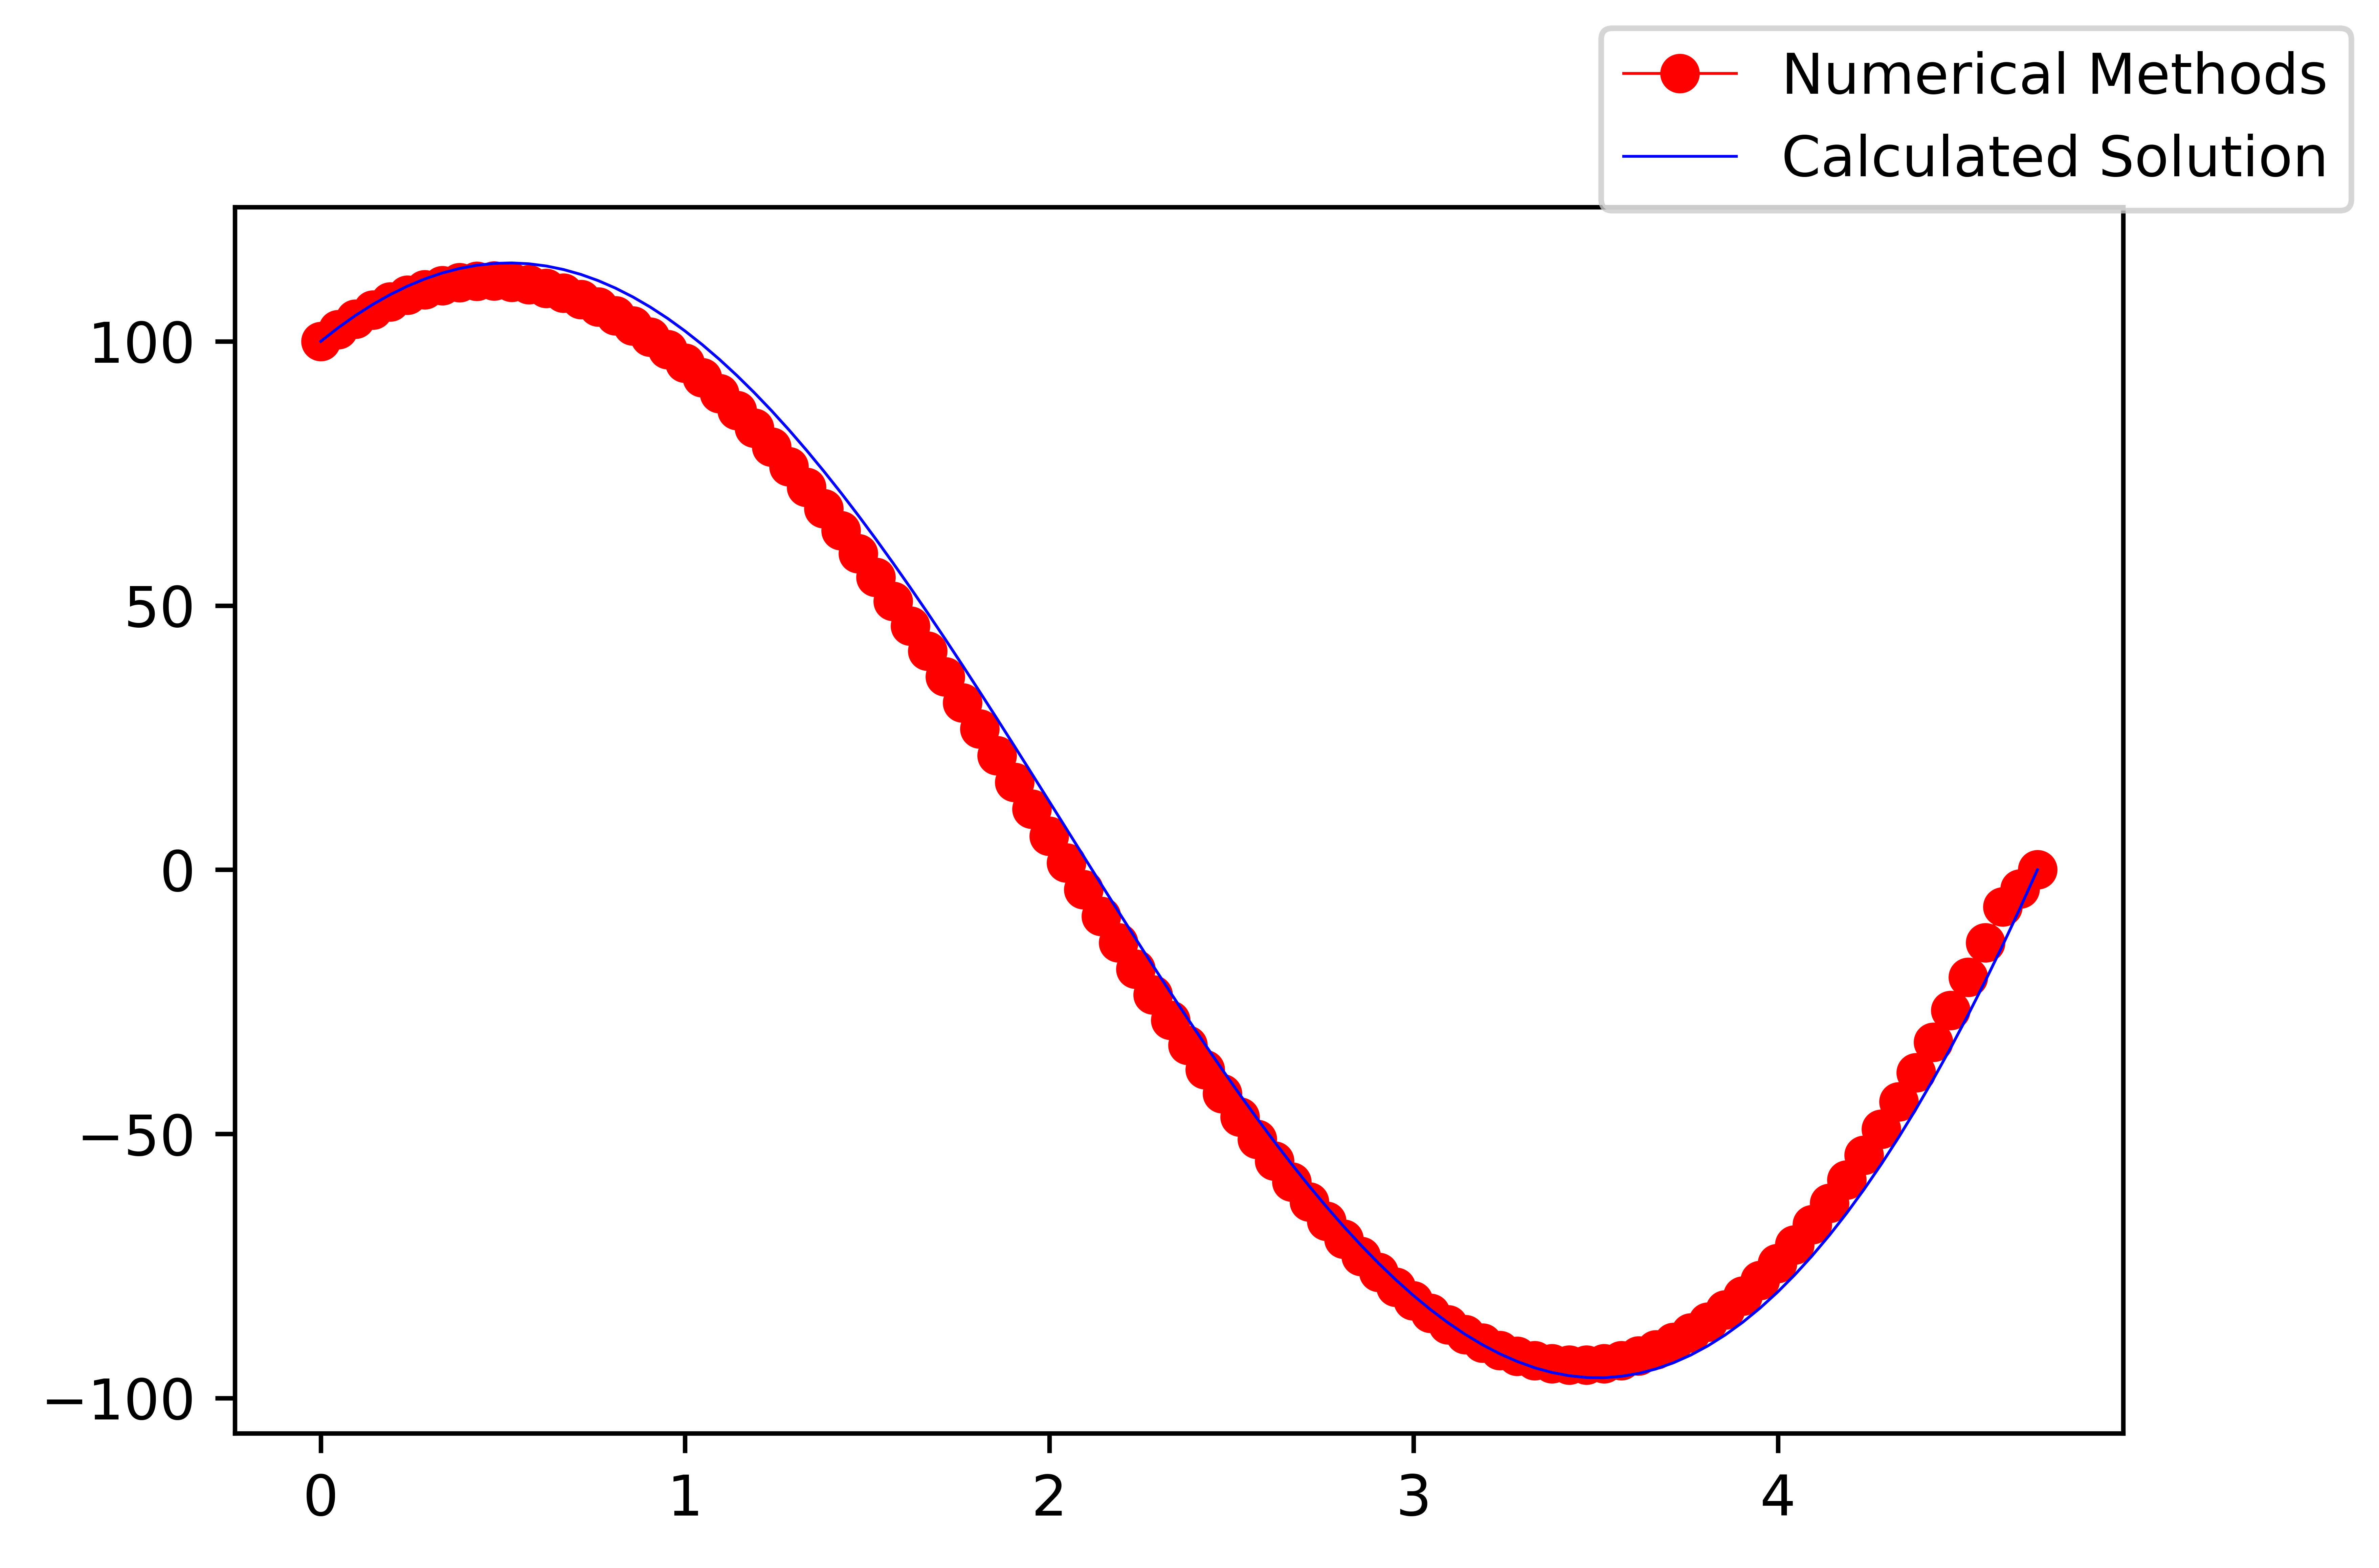

In [8]:
fig = plt.figure()
plt.plot(ticks,u2,color='red',label='Numerical Methods',linewidth=0.5,marker='o')
plt.plot(ticks,truth,color='blue',label='Calculated Solution',linewidth=0.5)
fig.dpi = 1200
fig.figsize = (16.0,9.0)
fig.legend()
plt.show()